In [1]:
from os import path
from glob import glob
from tqdm import tqdm
import torch

In [2]:
model = torch.hub.load('harritaylor/torchvggish', 'vggish')
model.eval()
root = './total'
filenames = glob(path.join(root,'*.wav'))
# save file test
result = torch.zeros((2871,3,128))
# torch.save(result,'waveoutvggish.pt')
# result = torch.load('waveoutvggish.pt')

Using cache found in /root/.cache/torch/hub/harritaylor_torchvggish_master


In [ ]:
for idx, data in enumerate(tqdm(filenames)):
    result[idx] = model.forward(data)
torch.save(result,'waveoutvggish.pt')

 57%|█████▋    | 1645/2871 [03:35<25:55,  1.27s/it]

In [17]:
result = torch.load('waveoutvggish.pt')
result2 = torch.load('waveoutvggish2.pt')
result3 = torch.load('waveoutvggish3.pt')

In [18]:
result[1000:2000] = result2[:1000]

In [19]:
result[2000:] = result3[:871]

In [23]:
print(torch.mean(result,0))

tensor([[175.0000,   8.0150, 146.9809,  96.6381, 215.0000,  76.0000,  77.0000,
         129.9418, 148.0000, 175.0000, 151.0000,  50.9997, 120.0000, 147.0000,
         100.9996,  35.0000, 109.2515, 239.0648, 197.0742, 194.3145,   0.0000,
         208.0226,  99.0073, 178.0902,  69.0885, 152.6576, 150.1689, 185.9028,
         123.5378,  68.2334, 193.7238, 131.4761, 106.2006,  81.9073, 140.0000,
         130.7106, 138.7872, 120.3720, 184.3302, 136.2045, 114.7997, 174.5733,
          31.2926, 143.3065, 123.7217, 164.1533, 132.9986,  91.6803, 124.9202,
         110.5259, 126.7673,  93.8098, 128.3048,  78.0756,  85.9993, 150.1588,
         124.7335, 105.6587, 113.6419, 205.9167, 129.1877, 122.0355, 121.3608,
          96.3163, 175.1996, 167.3877,  81.0526, 125.9937, 144.7074, 135.0812,
         146.9039, 111.5134, 127.9105, 187.9833, 139.6054, 154.6475, 132.7677,
         137.8722,  92.5622, 168.2598,  99.3117, 194.6155, 152.9996, 131.6102,
          92.2010, 101.9279, 139.4145, 202.5399, 147

In [24]:
vec_result = result.reshape((2871,-1))

In [26]:
vec_result.size()

torch.Size([2871, 384])

In [28]:
print(torch.mean(vec_result,0))
mean_vec = torch.mean(vec_result,0)

tensor([175.0000,   8.0150, 146.9809,  96.6381, 215.0000,  76.0000,  77.0000,
        129.9418, 148.0000, 175.0000, 151.0000,  50.9997, 120.0000, 147.0000,
        100.9996,  35.0000, 109.2515, 239.0648, 197.0742, 194.3145,   0.0000,
        208.0226,  99.0073, 178.0902,  69.0885, 152.6576, 150.1689, 185.9028,
        123.5378,  68.2334, 193.7238, 131.4761, 106.2006,  81.9073, 140.0000,
        130.7106, 138.7872, 120.3720, 184.3302, 136.2045, 114.7997, 174.5733,
         31.2926, 143.3065, 123.7217, 164.1533, 132.9986,  91.6803, 124.9202,
        110.5259, 126.7673,  93.8098, 128.3048,  78.0756,  85.9993, 150.1588,
        124.7335, 105.6587, 113.6419, 205.9167, 129.1877, 122.0355, 121.3608,
         96.3163, 175.1996, 167.3877,  81.0526, 125.9937, 144.7074, 135.0812,
        146.9039, 111.5134, 127.9105, 187.9833, 139.6054, 154.6475, 132.7677,
        137.8722,  92.5622, 168.2598,  99.3117, 194.6155, 152.9996, 131.6102,
         92.2010, 101.9279, 139.4145, 202.5399, 147.1292,  87.76

In [38]:
dist_vec = torch.cdist(mean_vec.reshape(1,-1), vec_result)
print(dist_vec)

tensor([[ 8.3666,  8.3066,  8.1548,  ..., 10.5357, 12.3085,  8.9722]],
       grad_fn=<ViewBackward>)


In [40]:
torch.min(dist_vec)

tensor(5.3385, grad_fn=<MinBackward1>)

In [42]:
torch.max(dist_vec)

tensor(28.1869, grad_fn=<MaxBackward1>)

In [55]:
np_dist_vec = dist_vec.detach().numpy()[0]

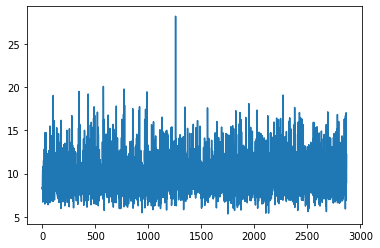

In [57]:
import matplotlib.pyplot as plt
plt.plot(np_dist_vec)

In [60]:
for idx, data in enumerate(np_dist_vec):
    if data > 19:
        print(idx)

104
348
433
577
773
988
1258
2272


In [61]:
nomalize_vec = np_dist_vec / max(np_dist_vec)

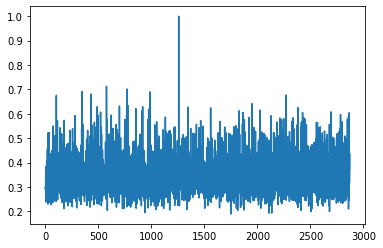

In [62]:
plt.plot(nomalize_vec)

In [68]:
for idx, data in enumerate(nomalize_vec):
    if data > 0.6:
        print(idx)

104
348
433
490
521
577
699
773
777
854
914
918
975
988
1258
1347
1559
1826
1863
1866
1949
2026
2272
2381
2426
2693
2866
